In [1]:
## this script is to get the plot of the velocity dispersion and column density and density as clusters ##

#modified on 17 September 2017 to change the name of Oph-X to Oph-FMM2b#

## modified on 27 November 2017 to change the radius to pc for all the plots

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
from decimal import Decimal # to print in scientific notation
import os.path
import glob
import CFS_functions as cfs
import function as mf
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy import integrate
from matplotlib.ticker import AutoMinorLocator

In [2]:
# parameters that are needed.
distinpc = 120.0
pc = 3.0857e+18 # cm 
AU = 1.496e+13  # cm
amu = 1.6605402e-24 # g
mu = 2.33*amu
mperH2= 2.8* amu
Msun=1.9891e+33 # g
G = 6.67259e-8 # cm3 g-1 s-2

In [3]:
list_of_files = sorted(glob.glob('./data_sigma/*.dat'))
for fileName in list_of_files:
# for fileName in sorted(glob.glob('./data_sigma/*.dat')):
    print(fileName)


./data_sigma/H-MM1_sigmav.dat
./data_sigma/H-MM2_sigmav.dat
./data_sigma/OpH-C_sigmav.dat
./data_sigma/OpH-E_sigmav.dat
./data_sigma/OpH-X_sigmav.dat
./data_sigma/OpHCN_sigmav.dat
./data_sigma/OpHFE_sigmav.dat
./data_sigma/zI-MM1_sigmav.dat
./data_sigma/zOpH-D_sigmav.dat


In [4]:
def readvelocitydispersionfile(fileName):
    fp = open (fileName,'r')
    ## Declaring an empty list to store the data from the .dat file
    radius1_list = []  # units cm 
    vthermal_list= []      # units ms-1
    vthermalerror_list = []
    vnontherma_list = []
    vnonthermaerror_list = []

    ## Reading the data from a .dat file line by line
    for line in fp:
        t = line.strip().split()  
        radius1_list.append(float(t[0]))
        vthermal_list.append(float(t[1]))
        vthermalerror_list.append(float(t[2]))
        vnontherma_list.append(float(t[3])) 
        vnonthermaerror_list.append(float(t[4]))

    fp.close()
    radius1= np.asarray(radius1_list)
    # converting to kms^-1
    vthermal = np.asarray(vthermal_list)*10**-3
    vnontherma =np.asarray(vnontherma_list)*10**-3
    vthermalerror = np.asarray(vthermalerror_list)*10**-3
    vnonthermaerror = np.asarray(vnonthermaerror_list)*10**-3
    
    return radius1,vthermal, vthermalerror, vnontherma,vnonthermaerror


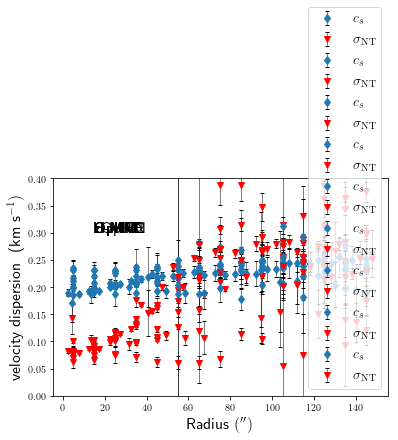

In [5]:
for i in range(0,len(list_of_files)):
    file = list_of_files[i]
    outputcorename = file[13]+file[14]+file[15]+file[16]+file[17]
    radius1,vthermal, vthermalerror, vnontherma,vnonthermaerror = readvelocitydispersionfile(list_of_files[i])
    plt.errorbar(radius1,vthermal,yerr=vthermalerror,lw=0,elinewidth=0.5,ecolor='k', fmt='d',markersize=6,capsize=2,label=r'$c_{s}$')
    plt.errorbar(radius1,vnontherma,yerr=vnonthermaerror,lw=0, color='red',elinewidth=0.5,ecolor='k', fmt='v',markersize=6,
                 capsize=2,label=r'$\sigma_{\rm NT}$')
    plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=14,loc=4)
    plt.ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 16)
    plt.xlabel(r' Radius $(^{\prime\prime})$',Fontsize = 16)
    plt.text(15,.3,r'%s'%(outputcorename),fontsize=16,color='black')
    # plt.legend('vthermal','vnonthermal)
    # plt.scatter(radius1,vthermal)
    # plt.scatter(radius1,vnontherma)
    plt.ylim(0,0.4)
#     plt.show()

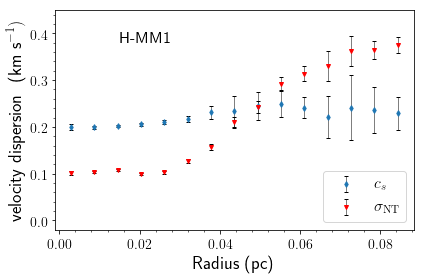

In [6]:
f, ax = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# f.subplots_adjust(hspace = 0, wspace=.001)
# axs = axs.ravel()
# ax = plt.subplot(1,1,1,figsize=(5,3)) 
for i in range(0,1):
    file = list_of_files[i]
    
    outputcorename = file[13]+file[14]+file[15]+file[16]+file[17]
    radius1,vthermal, vthermalerror, vnontherma,vnonthermaerror = readvelocitydispersionfile(list_of_files[i])
    radiusinpc_n = radius1*distinpc*AU/pc ## this was added to answer the referee on 27n18
    plt.errorbar(radiusinpc_n,vthermal,yerr=vthermalerror,lw=0,elinewidth=0.5,ecolor='k', fmt='d',markersize=4,capsize=2,label=r'$c_{s}$')
    plt.errorbar(radiusinpc_n,vnontherma,yerr=vnonthermaerror,lw=0, color='red',elinewidth=0.5,ecolor='k', fmt='v',markersize=4,
                 capsize=2,label=r'$\sigma_{\rm NT}$')
    
#     ax1.ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 16)
#     ax1.xlabel(r' Radius $(^{\prime\prime})$',Fontsize = 16)
    # plt.legend('vthermal','vnonthermal)
    # plt.scatter(radius1,vthermal)
    # plt.scatter(radius1,vnontherma)
    plt.ylim(-.02,.45) 
#     plt.ticks(np.arange(0, .5, 0.1))
    
    plt.ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 18)
    plt.xlabel(r'Radius (pc)',Fontsize = 18)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.xaxis.set_tick_params(labelsize=14)
plt.tight_layout() 
plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=4)    
plt.text(.015,.38,r'%s'%(outputcorename),fontsize=16,color='black')    
plt.savefig("./Plots_report/figures/Velocity_dispersion.eps",format='eps',dpi=300)
plt.show()

In [7]:
print(radiusinpc_n)

[ 0.0029089   0.00872671  0.01454451  0.02036232  0.02618012  0.03199793
  0.03781573  0.04363354  0.04945134  0.05526914  0.06108695  0.06690475
  0.07272256  0.07854036  0.08435817]


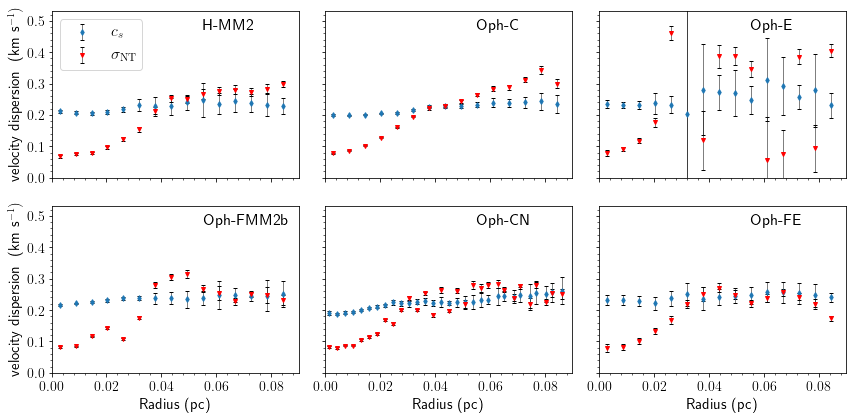

In [8]:
f, axs = plt.subplots(2, 3, sharex='col', sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = 0.08, wspace=.08)
axs = axs.ravel()
for i in range(0,6):
    file = list_of_files[i+1]
    outputcorename = file[13]+file[14]+file[15]+file[16]+file[17]
    if 3 > i > 0:
        outputcorename = file[13]+file[14]+'h'+file[16]+file[17]
    if i==3:
        outputcorename = file[13]+file[14]+'h'+file[16]+'FMM2b'
#     
    #### to get the proper core name ###
    if i > 3:
        outputcorename = file[13]+file[14]+'h' +'-'+file[16]+file[17]
#     print(outputcorename)
    radius1,vthermal, vthermalerror, vnontherma,vnonthermaerror = readvelocitydispersionfile(file)
    radiusinpc_n = radius1*distinpc*AU/pc
    axs[i].errorbar(radiusinpc_n,vthermal,yerr=vthermalerror,lw=0,elinewidth=0.5,ecolor='k', fmt='d',markersize=4,capsize=2,label=r'$c_{s}$')
    axs[i].errorbar(radiusinpc_n,vnontherma,yerr=vnonthermaerror,lw=0, color='red',elinewidth=0.5,ecolor='k', fmt='v',markersize=4,
                 capsize=2,label=r'$\sigma_{\rm NT}$')
    axs[0].legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=2)
#     ax1.ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 16)
#     ax1.xlabel(r' Radius $(^{\prime\prime})$',Fontsize = 16)
    # plt.legend('vthermal','vnonthermal)
    # plt.scatter(radius1,vthermal)
    # plt.scatter(radius1,vnontherma)
    axs[i].set_ylim(0,.53) 
    axs[i].set_yticks(np.arange(0, .6, 0.1))
    axs[i].yaxis.set_tick_params(labelsize=14)

    axs[i].set_xlim(0,0.09) 
    axs[i].set_xticks(np.arange(0, 0.091, 0.02))
    axs[i].xaxis.set_tick_params(labelsize=14)

    axs[i].text(0.055,.47,r'%s'%(outputcorename),fontsize=16,color='black')
    
    axs[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axs[i].xaxis.set_minor_locator(AutoMinorLocator(5))
axs[0].set_ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 15)
axs[3].set_ylabel(r' velocity dispersion \,\,(km s$^{-1})$', Fontsize = 15)
axs[3].set_xlabel(r'Radius (pc)',Fontsize = 15)
axs[4].set_xlabel(r'Radius (pc)',Fontsize = 15)
axs[5].set_xlabel(r'Radius (pc)',Fontsize = 15)
# Naming the core in each plots

# axs[0].text(100,.47,r'H-MM2',fontsize=16,color='black')
# axs[1].text(100,.47,r'OpH-FE',fontsize=16,color='black')
# axs[2].text(100,.47,r'OpH-C',fontsize=16,color='black')
# axs[3].text(100,.47,r'OpH-E',fontsize=16,color='black')
# axs[4].text(100,.47,r'OpH-X',fontsize=16,color='black')
# axs[5].text(100,.47,r'OpH-CN',fontsize=16,color='black')
# f.tight_layout()
plt.tight_layout() 
plt.savefig("./Plots_report/figures/Velocity_dispersion_all.eps",format='eps',dpi=300)
plt.show()

In [9]:
list_of_columndensity_files = sorted(glob.glob('./columndensity_data/*.dat'))
for name in list_of_columndensity_files:
    print(name)

./columndensity_data/H-MM1_column_density.dat
./columndensity_data/H-MM2_column_density.dat
./columndensity_data/OpH-C_column_density.dat
./columndensity_data/OpH-E_column_density.dat
./columndensity_data/OpH-X_column_density.dat
./columndensity_data/OpHCN_column_density.dat
./columndensity_data/OpHFE_column_density.dat


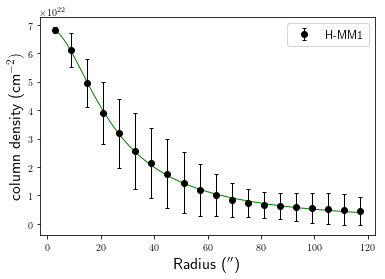

In [10]:
# f1, axs1 = plt.subplots(3, 1, sharex='col', sharey='row',
#                                                      figsize=(6,12))
# f1.subplots_adjust(hspace = 0, wspace=.001)
# axs1 = axs1.ravel()
plt.figure(figsize=(6,4)) 
for i in range(0,1):
    file = list_of_columndensity_files[i]
    outputcorename = file[21]+file[22]+file[23]+file[24]+file[25]
    fileName = list_of_columndensity_files[i]
    radius,columndensity,columndensityerror = cfs.readcolumndensity(file)

    vGuess = [np.max(columndensity),24,1]
    vPars, aCova = optimize.curve_fit(cfs.plummerfunction, radius, columndensity, vGuess,sigma=columndensityerror,absolute_sigma=True)
#     print(vPars)
    unc = np.sqrt(np.diag(aCova))
#     print(unc)
    xFine = np.linspace(radius[0],radius[len(radius)-1], num=100, endpoint=True)
#     axs1[i].errorbar(radius,columndensity,yerr=columndensityerror,lw=0,elinewidth=1,ecolor='k', fmt='o',markersize=4,capsize=2)
#     axs1[i].plot(xFine, cfs.plummerfunction(xFine,*vPars), 'g-', lw=1) # Fitted parameters
#     axs1[i].set_xlabel(r'radius (arcsec)',Fontsize = 14)
# #     axs1[1].text(80,6*10**22,r'%s'%(outputcorename),fontsize=16,color='black')
#     axs1[1].set_ylabel(r'column density cm$^{-2}$',fontsize=14)
    marker= ['o', 's','v']
    colors = ['k', 'g', 'y']
    
    plt.errorbar(radius,columndensity,yerr=columndensityerror,lw=0,elinewidth=1,ecolor='k',c = colors[i], fmt=marker[i],
                 markersize=6,capsize=2,label='%s'% '%.5s' % outputcorename)
    plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=12,loc=1)
    plt.plot(xFine, cfs.plummerfunction(xFine,*vPars), 'g-', lw=1) # Fitted parameters
    
    plt.xlabel(r'Radius ($^{\prime \prime}$)',Fontsize = 16)
#     axs1[1].text(80,6*10**22,r'%s'%(outputcorename),fontsize=16,color='black')
    plt.ylabel(r'column density (cm$^{-2})$',fontsize=16)
#     plt.yscale('log')
#plt.savefig("./Plots_report/figures/column_density_hmm1.eps",format='eps',dpi=300)
plt.show()

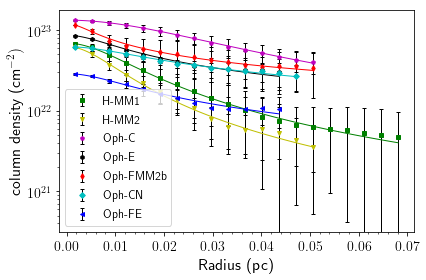

In [11]:
f, axc = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# plt.figure(figsize=(6,4)) 
for i in range(0,7):
    file = list_of_columndensity_files[i]
    outputcorename = file[21]+file[22]+file[23]+file[24]+file[25]
    if 4 > i > 1:
        outputcorename = file[21]+file[22]+'h'+file[24]+file[25]
    if i==4:
        outputcorename = file[21]+file[22]+'h'+file[24]+'FMM2b'

#     
    #### to get the proper core name ###
    if i > 4:
        outputcorename = file[21]+file[22]+'h' +'-'+file[24]+file[25]
    
#     
    
    
#     fileName = list_of_columndensity_files[i]
    radius,columndensity,columndensityerror = cfs.readcolumndensity(file)

    vGuess = [np.max(columndensity),24,1]
    vPars, aCova = optimize.curve_fit(cfs.plummerfunction, radius, columndensity, vGuess,sigma=columndensityerror,absolute_sigma=True)
#     print(vPars)
    unc = np.sqrt(np.diag(aCova))
#     print(unc)
    radiusinpc_cd = radius*distinpc*AU/pc  ## was added on 27n18 to change the xaxis
    xFine = np.linspace(radius[0],radius[len(radius)-1], num=100, endpoint=True)
    xFine1 = np.linspace(radiusinpc_cd[0],radiusinpc_cd[len(radiusinpc_cd)-1], num=100, endpoint=True)
#     axs1[i].errorbar(radius,columndensity,yerr=columndensityerror,lw=0,elinewidth=1,ecolor='k', fmt='o',markersize=4,capsize=2)
#     axs1[i].plot(xFine, cfs.plummerfunction(xFine,*vPars), 'g-', lw=1) # Fitted parameters
#     axs1[i].set_xlabel(r'radius (arcsec)',Fontsize = 14)
# #     axs1[1].text(80,6*10**22,r'%s'%(outputcorename),fontsize=16,color='black')
#     axs1[1].set_ylabel(r'column density cm$^{-2}$',fontsize=14)
    marker= [ 's','v','p', 'h','d','D','<']
    colors = ['g', 'y','m', 'k', 'r','c','b']
    
    plt.errorbar(radiusinpc_cd,columndensity,yerr=columndensityerror,lw=0,elinewidth=1,ecolor='k',c = colors[i], fmt=marker[i],
                 markersize=4,capsize=2,label='%s'% '%.9s' % outputcorename)
    plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=12,loc=3)
    plt.plot(xFine1, cfs.plummerfunction(xFine,*vPars), colors[i], lw=1) # Fitted parameters
    plt.xlabel(r'Radius (pc)',Fontsize = 16)
#     axs1[1].text(80,6*10**22,r'%s'%(outputcorename),fontsize=16,color='black')
    plt.ylabel(r'column density (cm$^{-2})$',Fontsize=16)
    axc.yaxis.set_minor_locator(AutoMinorLocator(5))
    axc.yaxis.set_tick_params(labelsize=14)
    axc.xaxis.set_minor_locator(AutoMinorLocator(5))
    axc.xaxis.set_tick_params(labelsize=14)
    plt.yscale('log')
plt.tight_layout() 
plt.savefig("./Plots_report/figures/column_density_set2.eps",format='eps',dpi=300)
plt.show()

In [12]:
print(radiusinpc_cd)

[ 0.00174534  0.00523602  0.00872671  0.01221739  0.01570807  0.01919876
  0.02268944  0.02618012  0.0296708   0.03316149  0.03665217  0.04014285
  0.04363354]


[  6.92183367e+22   2.14170921e+01   8.30089916e-01]
[  1.16722118e+21   7.14244354e+00   2.35300310e-01]


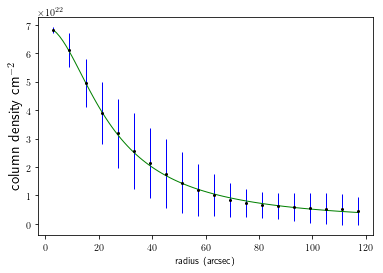

n_flat= 801552.106872 cm-3
r_flatinpc= 0.0124600459248
index= 1.33008991609


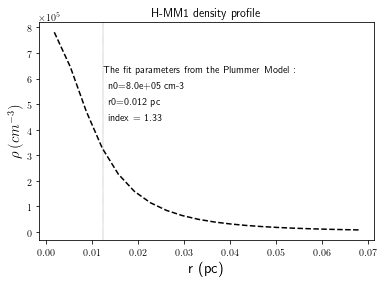

[  6.28465118e+22   1.70908237e+01   8.71557601e-01]
[  1.18762673e+21   4.04388700e+00   1.96551149e-01]


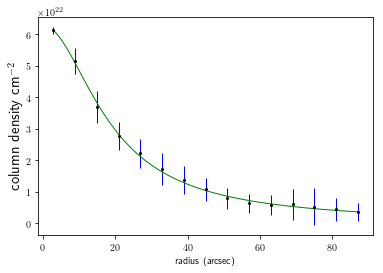

n_flat= 940434.028161 cm-3
r_flatinpc= 0.00994310746156
index= 1.37155760084


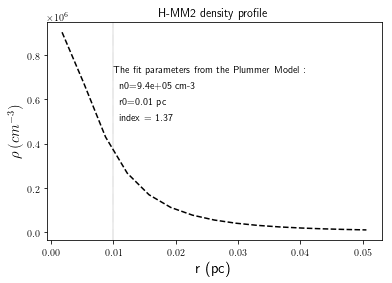

[  1.33454701e+23   4.97165228e+01   8.77456126e-01]
[  9.88658658e+20   1.90880453e+01   4.54170643e-01]


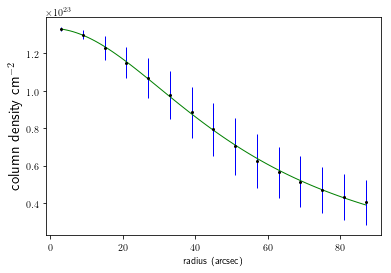

n_flat= 689414.483362 cm-3
r_flatinpc= 0.0289241020879
index= 1.37745612594


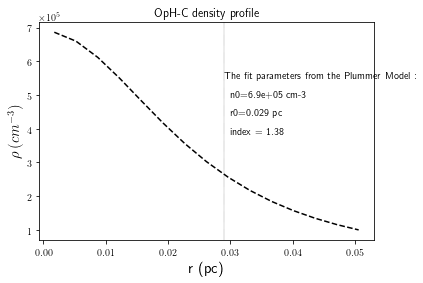

[  8.67224500e+22   1.44861000e+01   3.53573996e-01]
[  1.24050984e+21   5.07165262e+00   1.17888152e-01]


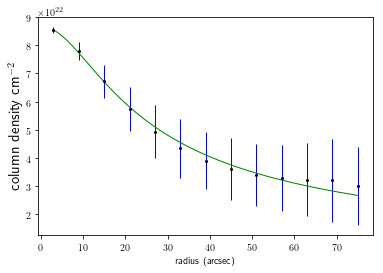

n_flat= 830567.914044 cm-3
r_flatinpc= 0.00842773006569
index= 0.853573996017


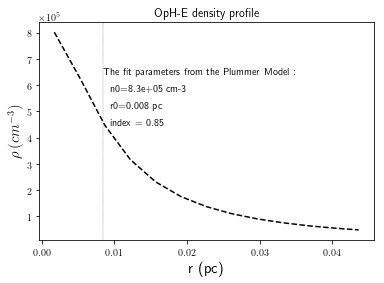

[  1.20449904e+23   7.87740669e+00   2.77184141e-01]
[  2.80566971e+21   3.34208348e+00   7.82643699e-02]


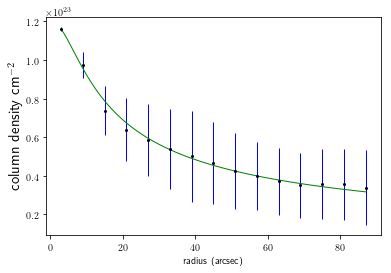

n_flat= 1777440.32335 cm-3
r_flatinpc= 0.00458292137548
index= 0.777184140648


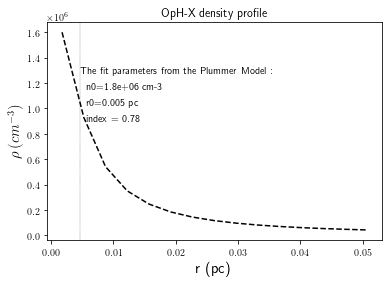

[  6.24196137e+22   2.22812471e+01   3.21517485e-01]
[  9.97273826e+20   8.01014945e+00   1.16193969e-01]


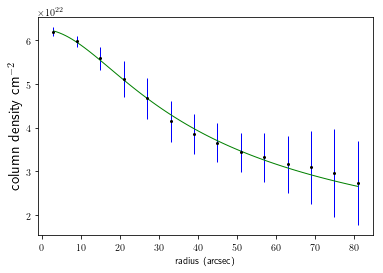

n_flat= 362778.008252 cm-3
r_flatinpc= 0.0129627944211
index= 0.821517485395


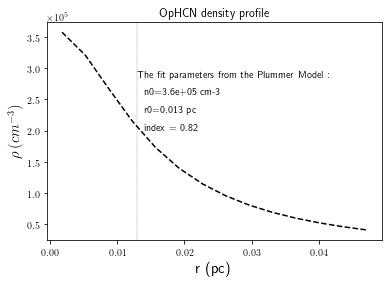

[  2.89347635e+22   1.91541149e+01   4.11330255e-01]
[  9.63634013e+20   7.67252448e+00   1.64410235e-01]


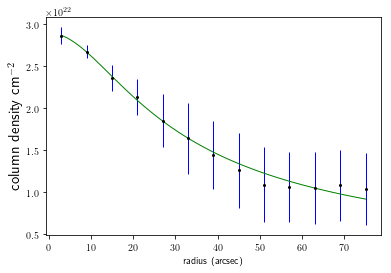

n_flat= 233623.330057 cm-3
r_flatinpc= 0.0111434899872
index= 0.911330254793


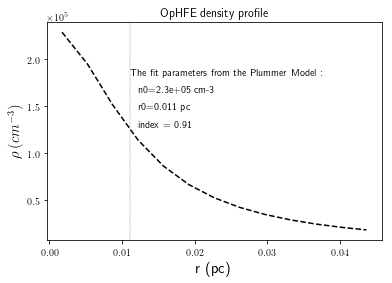

In [13]:
for i in range(0,len(list_of_columndensity_files)):
    fileName = list_of_columndensity_files[i]
    radius,columndensity,columndensityerror = cfs.readcolumndensity(fileName)

    vGuess = [np.max(columndensity),24,1]
    vPars, aCova = optimize.curve_fit(cfs.plummerfunction, radius, columndensity, vGuess,sigma=columndensityerror,absolute_sigma=True)
    print(vPars)
    unc = np.sqrt(np.diag(aCova))
    print(unc)
    xFine = np.linspace(radius[0],radius[len(radius)-1], num=100, endpoint=True)
    plt.errorbar(radius,columndensity,yerr=columndensityerror,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)
    plt.plot(xFine, cfs.plummerfunction(xFine,*vPars), 'g-', lw=1) # Fitted parameters
    plt.xlabel(r'radius (arcsec)')
    plt.ylabel(r'column density cm$^{-2}$',fontsize=15)
    plt.show()
    ### Density Profile
    n_flat,r_flatinpc,index= cfs.plummerparameter(vPars[0],vPars[1],vPars[2])
    print("n_flat=",n_flat,"cm-3")
    print("r_flatinpc=",r_flatinpc)
    print("index=" ,index)
    radiusinpc = radius*distinpc*AU/pc
    n = n_flat/(1+(radiusinpc/r_flatinpc)**2)**index 
    outputfilename =  fileName[21]+fileName[22]+fileName[23]+fileName[24]+fileName[25]
    save_path = './figures/'
    outputfigureden = os.path.join(save_path, outputfilename + '_density' +".eps")
    ranger1 = max(n)-0.20*max(n)
    ranger2 = ranger1 -0.08*max(n)
    ranger3 = ranger2 -0.08*max(n)
    ranger4 = ranger3 -0.08*max(n)
    plt.plot(radiusinpc,n,'k--')
    plt.ylabel(r'$ \rho \, (cm^{-3})$', fontsize=15)
    plt.xlabel(r'r (pc)',fontsize=15)
    plt.axvline(x=r_flatinpc,linewidth=0.4,color='k',ls=':')
    plt.text(r_flatinpc,ranger1, r'The fit parameters from the Plummer Model :' )
    plt.text(r_flatinpc+0.001,ranger2, 'n0=%s   cm-3'% '%.1e' % Decimal(n_flat) )
    plt.text(r_flatinpc+0.001,ranger3, 'r0=%s   pc'% round(r_flatinpc,3) )
    plt.text(r_flatinpc+0.001,ranger4, 'index = %s'% round(index,2) )
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,2))
    plt.title(outputfilename +' density profile')
#     plt.yscale('log')
#     plt.savefig(outputfigureden,format='eps',dpi=300)
    plt.show()

n_flat= 801552.106872 cm-3
r_flatinpc= 0.0124600459248
index= 1.33008991609


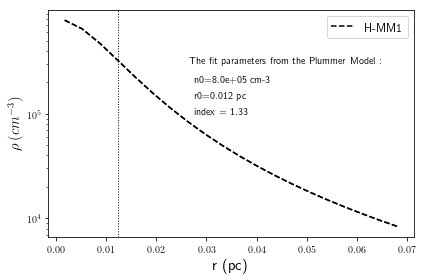

In [14]:

plt.figure(figsize=(6,4)) 
for i in range(0,1):
    file = list_of_columndensity_files[i]
    outputcorename = file[21]+file[22]+file[23]+file[24]+file[25]
    radius,columndensity,columndensityerror = cfs.readcolumndensity(file)

    vGuess = [np.max(columndensity),24,1]
    vPars, aCova = optimize.curve_fit(cfs.plummerfunction, radius, columndensity, vGuess,sigma=columndensityerror,absolute_sigma=True)

    ### Density Profile
    n_flat,r_flatinpc,index= cfs.plummerparameter(vPars[0],vPars[1],vPars[2])
    print("n_flat=",n_flat,"cm-3")
    print("r_flatinpc=",r_flatinpc)
    print("index=" ,index)
    radiusinpc = radius*distinpc*AU/pc
    n = n_flat/(1+(radiusinpc/r_flatinpc)**2)**index 
    colors = ['k', 'g', 'y']
    
    plt.plot(radiusinpc,n,'--',color = colors[i],label='%s'% '%.5s' % outputcorename)
    plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=12,loc=1)
    plt.ylabel(r'$ \rho \,$ (cm$^{-3})$', fontsize=15)
    plt.xlabel(r'Radius (pc)',fontsize=15)
    plt.axvline(x=r_flatinpc,linewidth=1,color= colors[i],ls=':')
    
    plt.plot(radiusinpc,n,'k--')
    plt.ylabel(r'$ \rho \, (cm^{-3})$', fontsize=15)
    plt.xlabel(r'r (pc)',fontsize=15)
    plt.text(r_flatinpc+0.014,3*10**5, r'The fit parameters from the Plummer Model :' )
    plt.text(r_flatinpc+0.015,2*10**5, 'n0=%s   cm-3'% '%.1e' % Decimal(n_flat) )
    plt.text(r_flatinpc+0.015,1.4*10**5, 'r0=%s   pc'% round(r_flatinpc,3) )
    plt.text(r_flatinpc+0.015,1*10**5, 'index = %s'% round(index,2) )
#     plt.title(outputfilename +' density profile')
    plt.yscale('log')
plt.tight_layout() 
#plt.savefig("./Plots_report/figures/density_hmm1.eps",format='eps',dpi=300)
plt.show()

n_flat= 801552.106872 cm-3
r_flatinpc= 0.0124600459248
index= 1.33008991609
n_flat= 940434.028161 cm-3
r_flatinpc= 0.00994310746156
index= 1.37155760084
n_flat= 689414.483362 cm-3
r_flatinpc= 0.0289241020879
index= 1.37745612594
n_flat= 830567.914044 cm-3
r_flatinpc= 0.00842773006569
index= 0.853573996017
n_flat= 1777440.32335 cm-3
r_flatinpc= 0.00458292137548
index= 0.777184140648
n_flat= 362778.008252 cm-3
r_flatinpc= 0.0129627944211
index= 0.821517485395
n_flat= 233623.330057 cm-3
r_flatinpc= 0.0111434899872
index= 0.911330254793


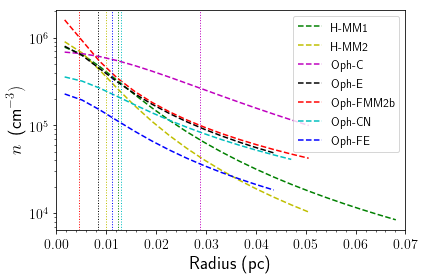

In [15]:
f, axd = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# plt.figure(figsize=(6,4)) 
for i in range(0,7):
    file = list_of_columndensity_files[i]
    outputcorename = file[21]+file[22]+file[23]+file[24]+file[25]
    if 4 > i > 1:
        outputcorename = file[21]+file[22]+'h'+file[24]+file[25]
    if i==4:
        outputcorename = file[21]+file[22]+'h'+file[24]+'FMM2b'
    #### to get the proper core name ###
    if i > 4:
        outputcorename = file[21]+file[22]+'h' +'-'+file[24]+file[25]
    radius,columndensity,columndensityerror = cfs.readcolumndensity(file)

    vGuess = [np.max(columndensity),24,1]
    vPars, aCova = optimize.curve_fit(cfs.plummerfunction, radius, columndensity, vGuess,sigma=columndensityerror,absolute_sigma=True)

    ### Density Profile
    n_flat,r_flatinpc,index= cfs.plummerparameter(vPars[0],vPars[1],vPars[2])
    print("n_flat=",n_flat,"cm-3")
    print("r_flatinpc=",r_flatinpc)
    print("index=" ,index)
    radiusinpc = radius*distinpc*AU/pc
    n = n_flat/(1+(radiusinpc/r_flatinpc)**2)**index 
    colors = ['g', 'y','m', 'k', 'r','c','b']
    plt.plot(radiusinpc,n,'--',color = colors[i],label='%s'% '%.9s' % outputcorename)
    plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=12,loc=1)
    plt.ylabel(r'$ n \,$ (cm$^{-3})$', fontsize=18)
    plt.xlabel(r'Radius (pc)',fontsize=18)
    plt.axvline(x=r_flatinpc,linewidth=1,color= colors[i],ls=':')
    plt.xlim(0,.07) 
    axd.yaxis.set_minor_locator(AutoMinorLocator(5))
    axd.yaxis.set_tick_params(labelsize=14)
    axd.xaxis.set_minor_locator(AutoMinorLocator(5))
    axd.xaxis.set_tick_params(labelsize=14)
    


#     plt.title(outputfilename +' density profile')
    plt.yscale('log')
plt.tight_layout() 
plt.savefig("./Plots_report/figures/density_set.eps",format='eps',dpi=300)
plt.show()

In [16]:
list_of_masstoflux_files_error = sorted(glob.glob('./errors/*_masstoflux_*.dat'))
for name in list_of_masstoflux_files_error:
    print(name)

In [17]:
# list_of_masstoflux_files = sorted(glob.glob('./magnetic_field_data/*_m2f.dat'))
# for name in list_of_masstoflux_files:
#     print(name)
# print(list_of_masstoflux_files[0])

In [18]:
# f, axmf = plt.subplots(1, 1, sharex='col', sharey='row',
#                                                      figsize=(6,4))


# Filename = list_of_masstoflux_files_error [1]

# Filename_m2f_data = list_of_masstoflux_files[0] # to start form H-MM2
# outputcorename =  Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]

# readm2ferrorsk1 = list_of_masstoflux_files_error [0]
# readm2ferrorsk2 = list_of_masstoflux_files_error [1]
# print(readm2ferrorsk1)
# print(readm2ferrorsk2)

# m2fk1,m2fk2 = cfs.readmasstoflux(Filename_m2f_data)
# mass2fluxk1_1quatile,mass2fluxk1_mean,mass2fluxk1_3quatile = cfs.readmasstofluxerror(readm2ferrorsk1)
# mass2fluxk2_1quatile,mass2fluxk2_mean,mass2fluxk2_3quatile = cfs.readmasstofluxerror(readm2ferrorsk2)
# N = 20 

# '''
# note had to redefine the radius, the numerical masstoflux code can only take radius < r_c
# so the new radius array has r_c as the maximum radius
# '''
# filenametrasonicradius = "./transonic_data/" + Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]+'rt.txt'
# r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
# r_c = np.asarray(r_cc_file)
# rc = r_c*distinpc*4.84814e-6 # in pc 
# print(r_c)
# radiusinpcformass = np.linspace(0,rc,N) 
# axmf.axhline(y=1,linewidth=0.1,color='k',ls=':')
# axmf.fill_between(radiusinpcformass[1:N], mass2fluxk1_1quatile,mass2fluxk1_3quatile,color = 'salmon', alpha=0.5,interpolate=True)
# axmf.fill_between(radiusinpcformass[1:N], mass2fluxk2_1quatile,mass2fluxk2_3quatile,color = 'turquoise', alpha=0.5,interpolate=True)
# axmf.plot(radiusinpcformass[1:N],m2fk1,linestyle='--',color='darkred',label=r'$ \kappa =1/2$')
# axmf.plot(radiusinpcformass[1:N],mass2fluxk1_mean,color='darkred')
# axmf.plot(radiusinpcformass[1:N],m2fk2,linestyle='--',color='navy',label=r'$ \kappa =2/3$')
# axmf.plot(radiusinpcformass[1:N],mass2fluxk2_mean,'navy')
# axmf.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=2)


# axmf.set_ylim(0,3.1) 
# axmf.set_yticks(np.arange(0, 3.1, 0.5))
# axmf.yaxis.set_tick_params(labelsize=14)
# axmf.set_xlim(np.min(radiusinpcformass[1:]),0.05) 
# # axmf.set_xticks(np.arange(np.min(radiusinpcformass[1:]), 0.045, 0.01))
# axmf.xaxis.set_tick_params(labelsize=14)
# axmf.text(.035,2.8,r'%s'%(outputcorename),fontsize=16,color='black')

# axmf.yaxis.set_minor_locator(AutoMinorLocator(5))
# axmf.xaxis.set_minor_locator(AutoMinorLocator(5))
# # #     plt.ylim(0,3)
# # #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
# # # 


# axmf.set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}$', fontsize=18)
# # axmf[3].set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_0}$', fontsize=14)
# axmf.set_xlabel(r'Radius (pc)',fontsize=18)
# # axmf[4].set_xlabel(r'Radius (pc)',fontsize=14)
# # axmf[5].set_xlabel(r'Radius (pc)',fontsize=14)
# # plt.text(0.004,2.5, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
# plt.tight_layout() 
# plt.savefig("./Plots_report/figures/mass2flux_error_HMM1.pdf",format='pdf',dpi=300)

# plt.show()  


In [19]:
# f, axmf = plt.subplots(2, 3, sharex='col', sharey='row',
#                                                      figsize=(12,6))
# f.subplots_adjust(hspace = .08, wspace=.08)
# axmf = axmf.ravel()
# for i in range(2,13,2):
#     j = int(i/2-1)
#     Filename = list_of_masstoflux_files_error [i]
#     Filename_m2f_data = list_of_masstoflux_files[int(j)+1] # to start form H-MM2
   
#     outputcorename =  Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]
#     ### to get the proper core name ###
#     if 4 > j > 0:
#         outputcorename = Filename[9]+Filename[10]+'h'+Filename[12]+Filename[13]
# #     
#     #### to get the proper core name ###
#     if j > 3:
#         outputcorename = Filename[9]+Filename[10]+'h'+'-'+Filename[12]+Filename[13]
#     print(outputcorename)
#     readm2ferrorsk1 = list_of_masstoflux_files_error [i]
#     readm2ferrorsk2 = list_of_masstoflux_files_error [i+1]
# #     print(readm2ferrorsk1)
# #     print(readm2ferrorsk2)

#     m2fk1,m2fk2 = cfs.readmasstoflux(Filename_m2f_data)
#     mass2fluxk1_1quatile,mass2fluxk1_mean,mass2fluxk1_3quatile = cfs.readmasstofluxerror(readm2ferrorsk1)
#     mass2fluxk2_1quatile,mass2fluxk2_mean,mass2fluxk2_3quatile = cfs.readmasstofluxerror(readm2ferrorsk2)
#     N = 20 

#     '''
#     note had to redefine the radius, the numerical masstoflux code can only take radius < r_c
#     so the new radius array has r_c as the maximum radius
#     '''
#     filenametrasonicradius = "./transonic_data/" + Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]+'rt.txt'
#     r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
#     r_c = np.asarray(r_cc_file)
#     rc = r_c*distinpc*4.84814e-6 # in pc 
# #     print(r_c)
#     radiusinpcformass = np.linspace(0,rc,N) 
#     axmf[j].axhline(y=1,linewidth=0.1,color='k',ls=':')
#     axmf[j].fill_between(radiusinpcformass[1:N], mass2fluxk1_1quatile,mass2fluxk1_3quatile,color = 'salmon', alpha=0.5,interpolate=True)
#     axmf[j].fill_between(radiusinpcformass[1:N], mass2fluxk2_1quatile,mass2fluxk2_3quatile,color = 'turquoise', alpha=0.5,interpolate=True)
#     axmf[j].plot(radiusinpcformass[1:N],m2fk1,linestyle='--',color='darkred',label=r'$ \kappa =1/2$')
#     axmf[j].plot(radiusinpcformass[1:N],mass2fluxk1_mean,color='darkred')
#     axmf[j].plot(radiusinpcformass[1:N],m2fk2,linestyle='--',color='navy',label=r'$ \kappa =2/3$')
#     axmf[j].plot(radiusinpcformass[1:N],mass2fluxk2_mean,color='navy')
#     axmf[0].legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=2)
    
    
#     axmf[j].set_ylim(0,3.1) 
#     axmf[j].set_yticks(np.arange(0, 3.1, 0.5))
#     axmf[j].yaxis.set_tick_params(labelsize=14)

#     axmf[j].set_xlim(np.min(radiusinpcformass[1:]),0.045)
# #     axmf[j].set_xticks(np.arange(0, 0.045, 0.01))
#     axmf[j].xaxis.set_tick_params(labelsize=14)
#     axmf[j].text(.030,2.5,r'%s'%(outputcorename),fontsize=16,color='black')
    
#     axmf[j].yaxis.set_minor_locator(AutoMinorLocator(5))
#     axmf[j].xaxis.set_minor_locator(AutoMinorLocator(5))
# #     plt.ylim(0,3)
# #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
# # 


# axmf[0].set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}$', fontsize=15)
# axmf[3].set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}$', fontsize=15)
# axmf[3].set_xlabel(r'Radius (pc)',fontsize=15)
# axmf[4].set_xlabel(r'Radius (pc)',fontsize=15)
# axmf[5].set_xlabel(r'Radius (pc)',fontsize=15)
# # plt.text(0.004,2.5, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
# plt.tight_layout() 
# plt.savefig("./Plots_report/figures/mass2flux_error_all.pdf",format='pdf',dpi=300)

# plt.show()  


In [20]:
list_of_magnetic_files = sorted(glob.glob('./magnetic_field_data/*_B_field.dat'))
list_of_magnetic_files_error = sorted(glob.glob('./errors/*_berror_*.dat'))
# for name in list_of_magnetic_files_error:
#     print(name)
#     print(list_of_magnetic_files)
for name in list_of_magnetic_files:
    print(name)
#     print(list_of_magnetic_files)

./magnetic_field_data/H-MM1_B_field.dat
./magnetic_field_data/H-MM2_B_field.dat
./magnetic_field_data/OpH-C_B_field.dat
./magnetic_field_data/OpH-E_B_field.dat
./magnetic_field_data/OpH-X_B_field.dat
./magnetic_field_data/OpHCN_B_field.dat
./magnetic_field_data/OpHFE_B_field.dat


H-MM1
50 50


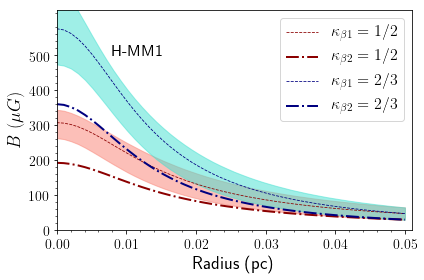

In [21]:
f, axd = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
Filename = "./errors/H-MM1_berror_k1.dat"
Filename_B_field_data = "./magnetic_field_data/H-MM1_B_field.dat" # to start form H-MM2

outputcorename =  Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]

print(outputcorename)
readBerrorsk1 = "./errors/H-MM1_berror_k1.dat"
readBerrorsk2 = "./errors/H-MM1_berror_k2.dat"
# readIsopedic_file = "./isopedic_data/HMM1_isopedic.dat"
#     print(readm2ferrorsk1)
#     print(readm2ferrorsk2)

## reading the transcrtical radisu###
filenametrasonicradius = "./transonic_data/" + Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]+'rt.txt'
r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
r_c = np.asarray(r_cc_file)
rc = r_c*distinpc*4.84814e-6 # in pc 

radiusinpcforplot,n, B1,B2,B1_ul,B2_ul = cfs.readmagneticfield(Filename_B_field_data)
######read the isopedic data################
# radiusinpcforplot_isopedic,B,B_sigma_montecarlo = cfs.isopedic_data(readIsopedic_file)
# plt.errorbar(radiusinpcforplot_isopedic,B,yerr=B_sigma_montecarlo,lw=0,elinewidth=1,
#              ecolor='darkviolet', fmt='v',markersize=4,capsize=6,label=r'$\rm{B_{isopedic}}$')
Bk1_1quatile,Bk1_mean,Bk1_3quatile = cfs.readmagneticfielderror(readBerrorsk1)
Bk2_1quatile,Bk2_mean,Bk2_3quatile = cfs.readmagneticfielderror(readBerrorsk2)
print(len(radiusinpcforplot),len(B1))
# plt.axvline(x=rc,linewidth=0.05,color='k',ls=':')
plt.fill_between(radiusinpcforplot, Bk1_1quatile, Bk1_3quatile,color = 'salmon', alpha=0.5,interpolate=True)
plt.fill_between(radiusinpcforplot, Bk2_1quatile, Bk2_3quatile,color = 'turquoise', alpha=0.5,interpolate=True)
plt.plot(radiusinpcforplot, B1, linestyle='--',color='darkred',lw=0.8,label=r'$ \kappa_{\beta1} =1/2$')
plt.plot(radiusinpcforplot, B1_ul,linestyle='-.',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
# plt.plot(radiusinpcforplot, Bk1_mean,'darkred',lw=0.8,label=r'$ \kappa =1/2$')
plt.plot(radiusinpcforplot, B2,linestyle='--',color='navy',lw=0.8,label=r'$ \kappa_{\beta1} =2/3$')
plt.plot(radiusinpcforplot, B2_ul,linestyle='-.',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
# plt.plot(radiusinpcforplot, Bk2_mean,'navy',lw=0.8,label=r'$ \kappa =2/3$')
plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=1)

plt.ylim(0,630) 
plt.yticks(np.arange(0, 501, 100))
axd.yaxis.set_tick_params(labelsize=14)

plt.xlim(np.min(radiusinpcforplot),0.051) 
# plt.xticks(np.arange(np.min(radiusinpcforplot), 0.051, 0.01))
axd.xaxis.set_tick_params(labelsize=14)
plt.text(.008,500,r'%s'%(outputcorename),fontsize=16,color='black')

axd.yaxis.set_minor_locator(AutoMinorLocator(5))
axd.xaxis.set_minor_locator(AutoMinorLocator(5))
# #     plt.ylim(0,3)
# #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
axd.set_ylabel(r' $B$ $(\mu G)$', fontsize=18)


axd.set_xlabel(r'Radius (pc)',fontsize=18)

plt.tight_layout() 
plt.savefig("./Plots_report/figures/magnetic_fields_HMM1.pdf",format='pdf',dpi=300)
plt.show()  


H-MM1
50 50


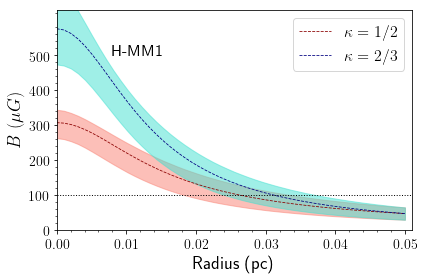

In [22]:
## added on 14 March 2019 to make a plot for the JCMT proposal
f, axd = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
Filename = "./errors/H-MM1_berror_k1.dat"
Filename_B_field_data = "./magnetic_field_data/H-MM1_B_field.dat" # to start form H-MM2

outputcorename =  Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]

print(outputcorename)
readBerrorsk1 = "./errors/H-MM1_berror_k1.dat"
readBerrorsk2 = "./errors/H-MM1_berror_k2.dat"
# readIsopedic_file = "./isopedic_data/HMM1_isopedic.dat"
#     print(readm2ferrorsk1)
#     print(readm2ferrorsk2)

## reading the transcrtical radisu###
filenametrasonicradius = "./transonic_data/" + Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]+'rt.txt'
r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
r_c = np.asarray(r_cc_file)
rc = r_c*distinpc*4.84814e-6 # in pc 

radiusinpcforplot,n, B1,B2,B1_ul,B2_ul = cfs.readmagneticfield(Filename_B_field_data)
######read the isopedic data################
# radiusinpcforplot_isopedic,B,B_sigma_montecarlo = cfs.isopedic_data(readIsopedic_file)
# plt.errorbar(radiusinpcforplot_isopedic,B,yerr=B_sigma_montecarlo,lw=0,elinewidth=1,
#              ecolor='darkviolet', fmt='v',markersize=4,capsize=6,label=r'$\rm{B_{isopedic}}$')
Bk1_1quatile,Bk1_mean,Bk1_3quatile = cfs.readmagneticfielderror(readBerrorsk1)
Bk2_1quatile,Bk2_mean,Bk2_3quatile = cfs.readmagneticfielderror(readBerrorsk2)
print(len(radiusinpcforplot),len(B1))
# plt.axvline(x=rc,linewidth=0.05,color='k',ls=':')
plt.fill_between(radiusinpcforplot, Bk1_1quatile, Bk1_3quatile,color = 'salmon', alpha=0.5,interpolate=True)
plt.fill_between(radiusinpcforplot, Bk2_1quatile, Bk2_3quatile,color = 'turquoise', alpha=0.5,interpolate=True)
plt.plot(radiusinpcforplot, B1, linestyle='--',color='darkred',lw=0.8,label=r'$ \kappa =1/2$')
# plt.plot(radiusinpcforplot, B1_ul,linestyle='-.',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
# plt.plot(radiusinpcforplot, Bk1_mean,'darkred',lw=0.8,label=r'$ \kappa =1/2$')
plt.plot(radiusinpcforplot, B2,linestyle='--',color='navy',lw=0.8,label=r'$ \kappa =2/3$')
# plt.plot(radiusinpcforplot, B2_ul,linestyle='-.',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
# plt.plot(radiusinpcforplot, Bk2_mean,'navy',lw=0.8,label=r'$ \kappa =2/3$')
plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=1)
plt.axhline(y=100,linewidth=1,color='k',ls=':')
plt.ylim(0,630) 
plt.yticks(np.arange(0, 501, 100))
axd.yaxis.set_tick_params(labelsize=14)

plt.xlim(np.min(radiusinpcforplot),0.051) 
# plt.xticks(np.arange(np.min(radiusinpcforplot), 0.051, 0.01))
axd.xaxis.set_tick_params(labelsize=14)
plt.text(.008,500,r'%s'%(outputcorename),fontsize=16,color='black')

axd.yaxis.set_minor_locator(AutoMinorLocator(5))
axd.xaxis.set_minor_locator(AutoMinorLocator(5))
# #     plt.ylim(0,3)
# #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
axd.set_ylabel(r' $B$ $(\mu G)$', fontsize=18)


axd.set_xlabel(r'Radius (pc)',fontsize=18)

plt.tight_layout() 
plt.savefig("./Plots_report/figures/magnetic_fields_HMM1_modified.pdf",format='pdf',dpi=300)
plt.show()  



H-MM2
50 50
Oph-C
50 50
Oph-E
50 50
Oph-FMM2b
50 50
Oph-CN
50 50
Oph-FE
50 50


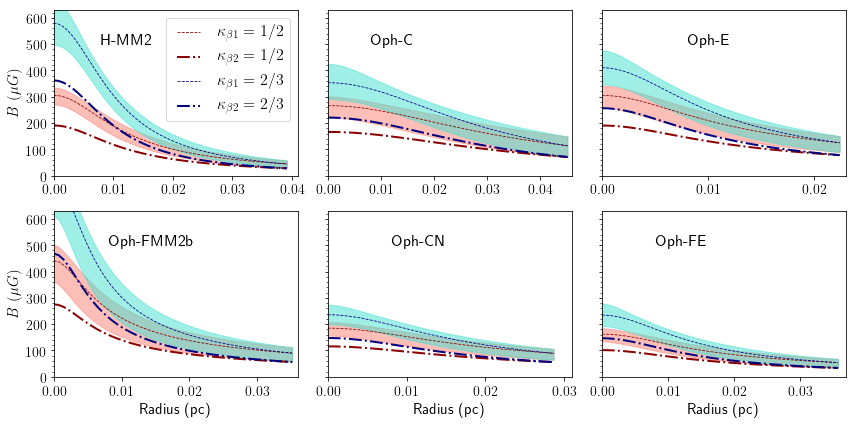

In [23]:
f, axb = plt.subplots(2, 3, sharex=False, sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = .04, wspace=.06)
axb = axb.ravel()
for i in range(2,13,2):
    j = int(i/2-1)
    Filename = list_of_magnetic_files_error[i]
    Filename_B_field_data = list_of_magnetic_files[int(j)+1] # to start form H-MM2
   
    outputcorename =  Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]
#     print(outputcorename)
    ### to get the proper core name ###
    if 3 > j > 0:
        outputcorename = Filename[9]+Filename[10]+'h'+Filename[12]+Filename[13]
    if j==3:
        outputcorename = Filename[9]+Filename[10]+'h'+Filename[12]+'FMM2b'
    if j > 3:
        outputcorename = Filename[9]+Filename[10]+'h'+'-'+Filename[12]+Filename[13]
    print(outputcorename)
    readBerrorsk1 = list_of_magnetic_files_error [i]
    readBerrorsk2 = list_of_magnetic_files_error [i+1]
#     print(readm2ferrorsk1)
#     print(readm2ferrorsk2)

    ## reading the transcrtical radisu###
    filenametrasonicradius = "./transonic_data/" + Filename[9]+Filename[10]+Filename[11]+Filename[12]+Filename[13]+'rt.txt'
    r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
    r_c = np.asarray(r_cc_file)
    rc = r_c*distinpc*4.84814e-6 # in pc 
    
    radiusinpcforplot,n, B1,B2,B1_ul,B2_ul = cfs.readmagneticfield(Filename_B_field_data)
    Bk1_1quatile,Bk1_mean,Bk1_3quatile = cfs.readmagneticfielderror(readBerrorsk1)
    Bk2_1quatile,Bk2_mean,Bk2_3quatile = cfs.readmagneticfielderror(readBerrorsk2)
    print(len(radiusinpcforplot),len(B1))
#     axb[j].axvline(x=rc,linewidth=0.05,color='k',ls=':')
    axb[j].fill_between(radiusinpcforplot, Bk1_1quatile, Bk1_3quatile,color = 'salmon', alpha=0.5,interpolate=True)
    axb[j].fill_between(radiusinpcforplot, Bk2_1quatile, Bk2_3quatile,color = 'turquoise', alpha=0.5,interpolate=True)
    axb[j].plot(radiusinpcforplot, B1,linestyle='--',color='darkred',lw=0.8,label=r'$ \kappa_{\beta1} =1/2$')
    axb[j].plot(radiusinpcforplot, B1_ul,linestyle='-.',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
#     axb[j].plot(radiusinpcforplot, Bk1_mean,'darkred',lw=0.8,label=r'$ \kappa_{\beta1} =1/2$')
    axb[j].plot(radiusinpcforplot, B2,linestyle='--',color='navy',lw=0.8,label=r'$ \kappa_{\beta1} =2/3$')
    axb[j].plot(radiusinpcforplot, B2_ul,linestyle='-.',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
#     axb[j].plot(radiusinpcforplot, Bk2_mean,'navy',lw=0.8,label=r'$ \kappa =2/3$')
    axb[0].legend(numpoints=3,fancybox=True,shadow=False,fontsize=16,loc=1)

    axb[j].set_ylim(0,630) 
    axb[j].set_yticks(np.arange(0, 601, 100))
    axb[j].yaxis.set_tick_params(labelsize=14)
    
    
    
    
    
#     axb[j].set_xlim(np.min(radiusinpcforplot),0.045)
#     axb[j].set_xticks(np.arange(0, 0.046, 0.01))
#     axb[j].xaxis.set_tick_params(labelsize=14)
    
    
    axb[j].text(.008,500,r'%s'%(outputcorename),fontsize=16,color='black')
    
    axb[j].yaxis.set_minor_locator(AutoMinorLocator(5))
#     axb[0].xaxis.set_minor_locator(AutoMinorLocator(5))
# #     plt.ylim(0,3)
# #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)

axb[0].set_xlim(np.min(radiusinpcforplot),0.041)
axb[0].set_xticks(np.arange(0, 0.041, 0.01))
axb[0].xaxis.set_tick_params(labelsize=14)
axb[1].set_xlim(np.min(radiusinpcforplot),0.046)
axb[1].set_xticks(np.arange(0, 0.046, 0.01))
axb[1].xaxis.set_tick_params(labelsize=14)
axb[2].set_xlim(np.min(radiusinpcforplot),0.023)
axb[2].set_xticks(np.arange(0, 0.023, 0.01))
axb[2].xaxis.set_tick_params(labelsize=14)
axb[3].set_xlim(np.min(radiusinpcforplot),0.036)
axb[3].set_xticks(np.arange(0, 0.036, 0.01))
axb[3].xaxis.set_tick_params(labelsize=14)
axb[4].set_xlim(np.min(radiusinpcforplot),0.031)
axb[4].set_xticks(np.arange(0, 0.031, 0.01))
axb[4].xaxis.set_tick_params(labelsize=14)
axb[5].set_xlim(np.min(radiusinpcforplot),0.037)
axb[5].set_xticks(np.arange(0, 0.037, 0.01))
axb[5].xaxis.set_tick_params(labelsize=14)


axb[0].set_ylabel(r' $B$ $(\mu G)$', fontsize=15)
axb[3].set_ylabel(r' $B$ $(\mu G)$', fontsize=15)
axb[3].set_xlabel(r'Radius (pc)',fontsize=15)
axb[4].set_xlabel(r'Radius (pc)',fontsize=15)
axb[5].set_xlabel(r'Radius (pc)',fontsize=15)
plt.tight_layout() 
plt.savefig("./Plots_report/figures/magnetic_fields_all.pdf",format='pdf',dpi=300)
plt.show()  


In [24]:
list_of_delta_B = sorted(glob.glob('./deltaB_data/*.dat'))
list_energy_file= sorted(glob.glob('./energy_data/*.dat'))
for name in list_of_delta_B:
    print(name)


./deltaB_data/H-MM1deltaB_variation.dat
./deltaB_data/H-MM2deltaB_variation.dat
./deltaB_data/OpH-CdeltaB_variation.dat
./deltaB_data/OpH-EdeltaB_variation.dat
./deltaB_data/OpH-XdeltaB_variation.dat
./deltaB_data/OpHCNdeltaB_variation.dat
./deltaB_data/OpHFEdeltaB_variation.dat


./deltaB_data/H-MM1deltaB_variation.dat
H-MM1
[ 0.04997705]


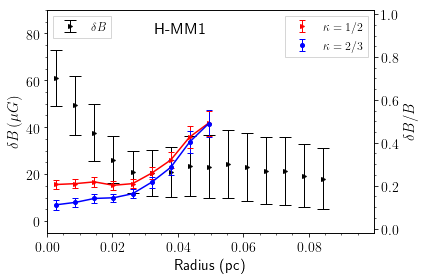

In [25]:
### This section is to plot the delta B / B and \delta B

f, axdb1 = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# plt.figure(figsize=(6,4)) 
# axdb = axdb.ravel()
for i in range(0,1,1):
    
    Filename = list_of_delta_B[int(i)] # to start form H-MM1
    print(Filename)
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  5 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    filenametrasonicradius = "./transonic_data/" + Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]+'rt.txt'
    r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
    r_c = np.asarray(r_cc_file)
    rc = r_c*distinpc*4.84814e-6 # in pc 
    print(rc)
    
    radiusforplot,deltaB,mean_deltaB,deltaB_sigma,deltaBoverB_k1,deltaBoverB_k1_sigma,deltaBoverB_k2,deltaBoverB_k2_sigma = cfs.readdeltaBdata(Filename)
#     plt.figure(1)
#     axdb1.scatter(radiusforplot,deltaB, marker="v",c='black')
    axdb1.errorbar(radiusforplot,deltaB,yerr=deltaB_sigma,lw=0,elinewidth=1,
                   ecolor='k', c = 'k', fmt='>',markersize=4,capsize=6,label=r'$\delta B $')
    axdb1.set_ylabel(r'$\delta B \, (\mu G) $',fontsize=15)
    axdb1.set_xlabel(r'Radius (pc) ',fontsize=15)
    axdb1.set_xlim(0,.1) 
    axdb1.set_xticks(np.arange(0, .1, 0.02))
    axdb1.xaxis.set_tick_params(labelsize=14)
    axdb2 = axdb1.twinx()
#     outputfiguremag1 = os.path.join(save_path, 'H_MM1' + 'delta_B' +".png")
    
   
    
    
    axdb2.errorbar(radiusforplot[radiusforplot<=rc],deltaBoverB_k1[radiusforplot<=rc],yerr=deltaBoverB_k1_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
             ecolor='r',c = 'r', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =1/2$')
    axdb2.plot(radiusforplot[radiusforplot<=rc],deltaBoverB_k1[radiusforplot<=rc],'r')

    axdb2.errorbar(radiusforplot[radiusforplot<=rc],deltaBoverB_k2[radiusforplot<=rc],yerr=deltaBoverB_k2_sigma[radiusforplot<=rc],lw=2,elinewidth=1,
             ecolor='b',c = 'b',fmt='o',markersize=4,capsize=3,label=r'$ \kappa =2/3$')
    axdb2.plot(radiusforplot[radiusforplot<=rc],deltaBoverB_k2[radiusforplot<=rc], 'b')
    axdb2.set_ylabel(r'$\delta B /B $',fontsize=15)
    axdb1.set_ylim(-5,90) 
    axdb1.set_yticks(np.arange(0, 91, 20))
    axdb1.yaxis.set_tick_params(labelsize=14)
    axdb2.set_ylim(-0.02,1.02) 
    axdb2.set_yticks(np.arange(0, 1.1, .2))
    axdb2.yaxis.set_tick_params(labelsize=14)
    axdb1.text(.033,80,r'%s'%(outputcorename),fontsize=16,color='black')
    # added these three lines
    
    axdb1.legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=2)
    axdb2.legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=1)
    
#     axdb2.legend(numpoints=3,fancybox=False,shadow=False,fontsize=12,loc=2)

    
    axb[j].text(.008,500,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb1.xaxis.set_minor_locator(AutoMinorLocator(4))
    axdb1.yaxis.set_minor_locator(AutoMinorLocator(4))
    axdb2.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.tight_layout() 
#plt.savefig("./Plots_report/figures/delta_B.eps",format='eps',dpi=300)
plt.show()
plt.show()
    

./deltaB_data/H-MM1deltaB_variation.dat
H-MM1
[ 0.04997705]


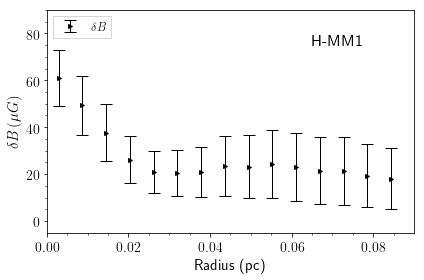

In [26]:
### This section is to plot the delta B / B and \delta B

f, axdb1 = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# plt.figure(figsize=(6,4)) 
# axdb = axdb.ravel()
for i in range(0,1,1):
    
    Filename = list_of_delta_B[int(i)] # to start form H-MM1
    print(Filename)
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  5 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    filenametrasonicradius = "./transonic_data/" + Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]+'rt.txt'
    r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
    r_c = np.asarray(r_cc_file)
    rc = r_c*distinpc*4.84814e-6 # in pc 
    print(rc)
    
    radiusforplot,deltaB,mean_deltaB,deltaB_sigma,deltaBoverB_k1,deltaBoverB_k1_sigma,deltaBoverB_k2,deltaBoverB_k2_sigma = cfs.readdeltaBdata(Filename)
#     plt.figure(1)
#     axdb1.scatter(radiusforplot,deltaB, marker="v",c='black')
    axdb1.errorbar(radiusforplot,deltaB,yerr=deltaB_sigma,lw=0,elinewidth=1,
                   ecolor='k', c = 'k', fmt='>',markersize=4,capsize=6,label=r'$\delta B $')
    axdb1.set_ylabel(r'$\delta B \, (\mu G) $',fontsize=15)
    axdb1.set_xlabel(r'Radius (pc) ',fontsize=15)
    axdb1.set_xlim(0,.09) 
    axdb1.set_xticks(np.arange(0, .09, 0.02))
    axdb1.xaxis.set_tick_params(labelsize=14)
#     axdb2 = axdb1.twinx()
# #     outputfiguremag1 = os.path.join(save_path, 'H_MM1' + 'delta_B' +".png")
    
   
    
    
#     axdb2.errorbar(radiusforplot[radiusforplot<=rc],deltaBoverB_k1[radiusforplot<=rc],yerr=deltaBoverB_k1_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
#              ecolor='r',c = 'r', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =1/2$')
#     axdb2.plot(radiusforplot[radiusforplot<=rc],deltaBoverB_k1[radiusforplot<=rc],'r')

#     axdb2.errorbar(radiusforplot[radiusforplot<=rc],deltaBoverB_k2[radiusforplot<=rc],yerr=deltaBoverB_k2_sigma[radiusforplot<=rc],lw=2,elinewidth=1,
#              ecolor='b',c = 'b',fmt='o',markersize=4,capsize=3,label=r'$ \kappa =2/3$')
#     axdb2.plot(radiusforplot[radiusforplot<=rc],deltaBoverB_k2[radiusforplot<=rc], 'b')
#     axdb2.set_ylabel(r'$\delta B /B $',fontsize=15)
    axdb1.set_ylim(-5,90) 
    axdb1.set_yticks(np.arange(0, 91, 20))
    axdb1.yaxis.set_tick_params(labelsize=14)
#     axdb2.set_ylim(-0.02,1.02) 
#     axdb2.set_yticks(np.arange(0, 1.1, .2))
#     axdb2.yaxis.set_tick_params(labelsize=14)
    axdb1.text(.065,75,r'%s'%(outputcorename),fontsize=16,color='black')
#     # added these three lines
    
    axdb1.legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=2)
#     axdb2.legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=1)
    
#     axdb2.legend(numpoints=3,fancybox=False,shadow=False,fontsize=12,loc=2)

    
    axb[j].text(.008,500,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb1.xaxis.set_minor_locator(AutoMinorLocator(4))
    axdb1.yaxis.set_minor_locator(AutoMinorLocator(4))
#     axdb2.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.tight_layout() 
plt.savefig("./Plots_report/figures/H-MM1_delta_B.eps",format='eps',dpi=300)
plt.show()
plt.show()

H-MM2
Oph-C
Oph-E
Oph-FMM2b
Oph-CN
Oph-FE


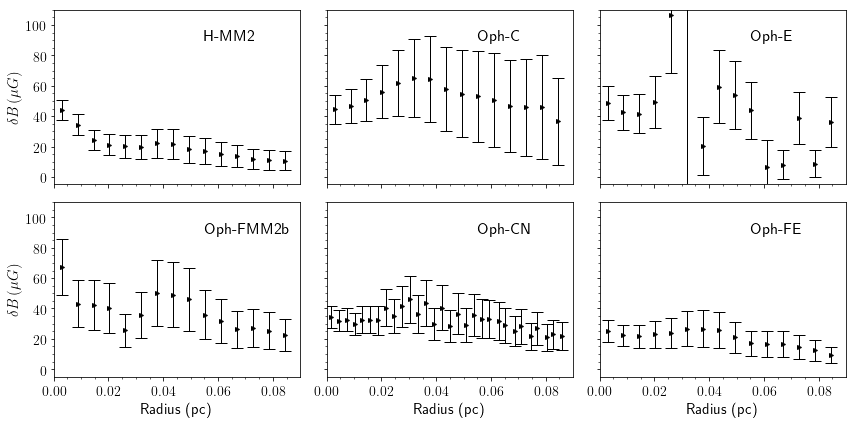

In [27]:
### This section is to plot the delta B / B and \delta B

f, axdb = plt.subplots(2, 3, sharex='col', sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = .05, wspace=.08)
axdb = axdb.ravel()
for i in range(1,7,1):
   
    Filename = list_of_delta_B[int(i)] # to start form H-MM1
    
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  4 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if  i==4:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+'FMM2b'
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    
    radiusforplot,deltaB,mean_deltaB,deltaB_sigma,deltaBoverB_k1,deltaBoverB_k1_sigma,deltaBoverB_k2,deltaBoverB_k2_sigma = cfs.readdeltaBdata(Filename)
    j = int(i-1)
    plt.figure(1)
    ########### with the mean delta B values caclculated using Monte Carlo########
#     axdb[j].errorbar(radiusforplot,mean_deltaB,yerr=deltaB_sigma,lw=0,elinewidth=1,
#                    ecolor='k', c = 'k', fmt='>',markersize=4,capsize=6,label=r'$\delta B$')
    ########### with the actual delta B calculated from the date values########
    axdb[j].errorbar(radiusforplot,deltaB,yerr=deltaB_sigma,lw=0,elinewidth=1,
                   ecolor='k', c = 'k', fmt='>',markersize=4,capsize=6,label=r'$\delta B$')
    
    axdb[j].set_xlim(0,.09) 
    axdb[j].set_xticks(np.arange(0, .1, 0.02))
    axdb[j].xaxis.set_tick_params(labelsize=14)
    axdb[j].set_ylim(-5,110) 
    axdb[j].set_yticks(np.arange(0, 111, 20))
    axdb[j].yaxis.set_tick_params(labelsize=14)
    axdb[j].text(.055,90,r'%s'%(outputcorename),fontsize=16,color='black')
    
    axdb[j].xaxis.set_minor_locator(AutoMinorLocator(4))
    axdb[j].yaxis.set_minor_locator(AutoMinorLocator(4))
#     axdb2.yaxis.set_minor_locator(AutoMinorLocator(4))
# axdb[0].legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=2)
axdb[0].set_ylabel(r'$\delta B \, (\mu G) $',fontsize=15)
axdb[3].set_ylabel(r'$\delta B \, (\mu G) $',fontsize=15)
axdb[3].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[4].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[5].set_xlabel(r'Radius (pc)',fontsize=15)
    
plt.tight_layout() 
plt.savefig("./Plots_report/figures/delta_B_all.eps",format='eps',dpi=300)

plt.show()
    
    

H-MM1
[ 0.04997705]


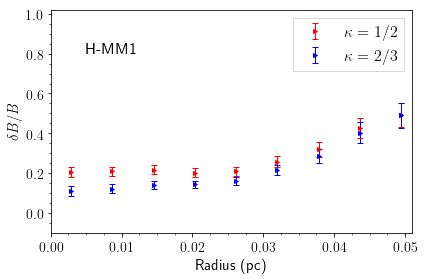

In [28]:
### This section is to plot the delta B / B 

f, axdb = plt.subplots(1, 1, sharex=False, sharey='row',
                                                     figsize=(6,4))
f.subplots_adjust(hspace = .05, wspace=.08)
# axdb = axdb.ravel()
for i in range(0,1,1):
   
    Filename = list_of_delta_B[int(i)] # to start form H-MM1
    
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  5 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    ## reading the transcrtical radisu###
    filenametrasonicradius = "./transonic_data/" + Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]+'rt.txt'
    r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
    r_c = np.asarray(r_cc_file)
    rc = r_c*distinpc*4.84814e-6 # in pc 
    print(rc)
    radiusforplot,deltaB,mean_deltaB,deltaB_sigma,deltaBoverB_k1,deltaBoverB_k1_sigma,deltaBoverB_k2,deltaBoverB_k2_sigma= cfs.readdeltaBdata(Filename)
    
    j = int(i-1)
    
    radiusinsidecore = radiusforplot[radiusforplot<=rc]

    axdb.errorbar(radiusinsidecore,deltaBoverB_k1[radiusforplot<=rc],yerr=deltaBoverB_k1_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
                   ecolor='r',c = 'r', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =1/2$')
#     axdb[j].plot (radiusforplot,deltaBoverB_k1,'r')
    axdb.errorbar(radiusinsidecore,deltaBoverB_k2[radiusforplot<=rc],yerr=deltaBoverB_k2_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
                   ecolor='b',c = 'b', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =2/3$')
#     axdb[j].plot(radiusforplot,deltaBoverB_k2,'b')
    
    axdb.set_xlim(0,0.051) 
    axdb.set_xticks(np.arange(0, 0.051, 0.01))
    axdb.xaxis.set_tick_params(labelsize=14)
    axdb.set_ylim(-0.1,1.02) 
    axdb.set_yticks(np.arange(0, 1.1, .2))
    axdb.yaxis.set_tick_params(labelsize=14)
    axdb.text(.005,.8,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb.legend(numpoints=1,fancybox=False,shadow=False,fontsize=16,loc=1)
    

    axdb.xaxis.set_minor_locator(AutoMinorLocator(4))
    axdb.yaxis.set_minor_locator(AutoMinorLocator(4))
    

    

axdb.set_ylabel(r'$\delta B /B\ $',fontsize=15)
# axdb[3].set_ylabel(r'$\delta B/B \ $',fontsize=15)
axdb.set_xlabel(r'Radius (pc)',fontsize=15)
# axdb[4].set_xlabel(r'Radius (pc)',fontsize=15)
# axdb[5].set_xlabel(r'Radius (pc)',fontsize=15)
plt.tight_layout() 
    

plt.savefig("./Plots_report/figures/H-MM1_deltaB_overB.eps",format='eps',dpi=300)

plt.show()

H-MM2
[ 0.03913662]
Oph-C
[ 0.04515263]
Oph-E
[ 0.02239014]
Oph-FMM2b
[ 0.03514574]
Oph-CN
[ 0.02866175]
Oph-FE
[ 0.03577663]


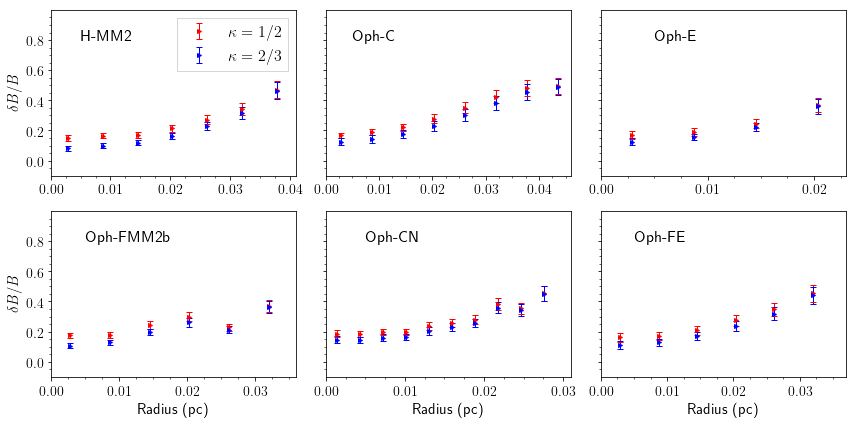

In [29]:
### This section is to plot the delta B / B 

f, axdb = plt.subplots(2, 3, sharex=False, sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = .05, wspace=.08)
axdb = axdb.ravel()
for i in range(1,7,1):
   
    Filename = list_of_delta_B[int(i)] # to start form H-MM1
    
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  4 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if  i==4:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+'FMM2b'
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    ## reading the transcrtical radisu###
    filenametrasonicradius = "./transonic_data/" + Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]+'rt.txt'
    r_cc_file = mf.readfilefortransonicdata(filenametrasonicradius)
    r_c = np.asarray(r_cc_file)
    rc = r_c*distinpc*4.84814e-6 # in pc 
    print(rc)
    radiusforplot,deltaB,mean_deltaB,deltaB_sigma,deltaBoverB_k1,deltaBoverB_k1_sigma,deltaBoverB_k2,deltaBoverB_k2_sigma= cfs.readdeltaBdata(Filename)
    
    j = int(i-1)
    
    radiusinsidecore = radiusforplot[radiusforplot<=rc]

    axdb[j].errorbar(radiusinsidecore,deltaBoverB_k1[radiusforplot<=rc],yerr=deltaBoverB_k1_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
                   ecolor='r',c = 'r', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =1/2$')
#     axdb[j].plot (radiusforplot,deltaBoverB_k1,'r')
    axdb[j].errorbar(radiusinsidecore,deltaBoverB_k2[radiusforplot<=rc],yerr=deltaBoverB_k2_sigma[radiusforplot<=rc],lw=0,elinewidth=1,
                   ecolor='b',c = 'b', fmt='>',markersize=4,capsize=3,label=r'$ \kappa =2/3$')
#     axdb[j].plot(radiusforplot,deltaBoverB_k2,'b')
    
#     axdb[j].set_xlim(0,.09) 
#     axdb[j].set_xticks(np.arange(0, .1, 0.02))
#     axdb[j].xaxis.set_tick_params(labelsize=14)
    axdb[j].set_ylim(-0.1,1) 
    axdb[j].set_yticks(np.arange(0, 1, .2))
    axdb[j].yaxis.set_tick_params(labelsize=14)
    axdb[j].text(.005,.8,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb[0].legend(numpoints=1,fancybox=False,shadow=False,fontsize=16,loc=1)
    

    axdb[j].xaxis.set_minor_locator(AutoMinorLocator(4))
    axdb[j].yaxis.set_minor_locator(AutoMinorLocator(4))
    
axdb[0].set_xlim(np.min(radiusinpcforplot),0.041)
axdb[0].set_xticks(np.arange(0, 0.041, 0.01))
axdb[0].xaxis.set_tick_params(labelsize=14)
axdb[1].set_xlim(np.min(radiusinpcforplot),0.046)
axdb[1].set_xticks(np.arange(0, 0.046, 0.01))
axdb[1].xaxis.set_tick_params(labelsize=14)
axdb[2].set_xlim(np.min(radiusinpcforplot),0.023)
axdb[2].set_xticks(np.arange(0, 0.023, 0.01))
axdb[2].xaxis.set_tick_params(labelsize=14)
axdb[3].set_xlim(np.min(radiusinpcforplot),0.036)
axdb[3].set_xticks(np.arange(0, 0.036, 0.01))
axdb[3].xaxis.set_tick_params(labelsize=14)
axdb[4].set_xlim(np.min(radiusinpcforplot),0.031)
axdb[4].set_xticks(np.arange(0, 0.031, 0.01))
axdb[4].xaxis.set_tick_params(labelsize=14)
axdb[5].set_xlim(np.min(radiusinpcforplot),0.037)
axdb[5].set_xticks(np.arange(0, 0.037, 0.01))
axdb[5].xaxis.set_tick_params(labelsize=14)
    

axdb[0].set_ylabel(r'$\delta B /B\ $',fontsize=15)
axdb[3].set_ylabel(r'$\delta B/B \ $',fontsize=15)
axdb[3].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[4].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[5].set_xlabel(r'Radius (pc)',fontsize=15)
plt.tight_layout() 
    

plt.savefig("./Plots_report/figures/delta_B_B_all.eps",format='eps',dpi=300)

plt.show()
    
    

H-MM1


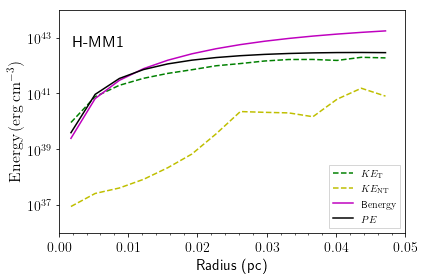

In [30]:
f, axdb = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))
# f.subplots_adjust(hspace = .05, wspace=.08)
# axdb = axdb.ravel()
for i in range(0,1,1):
   
    Filename = list_energy_file[int(i)] # to start form H-MM1
    
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  5 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    
    radiusinpcforenergy, kineticenergy,kineticnonthermal,potentialenergy,magneticenergy= cfs.readenergydata(Filename)
    
    j = int(i-1)
    
    axdb.plot(radiusinpcforenergy,kineticenergy,'g--',label=r'$KE_{\rm {T}}$')
    axdb.plot(radiusinpcforenergy,kineticnonthermal,'y--',label=r'$KE_{\rm {NT}}$')
    axdb.plot(radiusinpcforenergy,magneticenergy,'m',label=r'B$\rm{energy}$')
    axdb.plot(radiusinpcforenergy,potentialenergy,'k',label=r'$PE$')
    
    axdb.set_yscale('log')
    
    axdb.set_xlim(0,.05) 
    axdb.set_xticks(np.arange(0, .051, 0.01))
    axdb.xaxis.set_tick_params(labelsize=14)
    axdb.set_ylim(1e36,1e44) 
#     axdb[j].set_yticks(np.arange(1e36,1e43,1e2))
    axdb.yaxis.set_tick_params(labelsize=14)
    axdb.text(.002,5e42,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb.legend(numpoints=1,fancybox=False,shadow=False,fontsize=10,loc=4)
    

    axdb.xaxis.set_minor_locator(AutoMinorLocator(5))
#     axdb.yaxis.set_minor_locator(AutoMinorLocator(4))

axdb.set_ylabel(r' $ \rm {Energy \, (erg \, cm^{-3})}$',fontsize=16)
# axdb.set_ylabel(r' $ Energy \, (g \, cm^{2}s^{-2})$',fontsize=16)
axdb.set_xlabel(r'Radius (pc)',fontsize=15)
axdb.set_xlabel(r'Radius (pc)',fontsize=15)
axdb.set_xlabel(r'Radius (pc)',fontsize=15)

plt.tight_layout()  

#plt.savefig("./Plots_report/figures/energy_H-MM1.eps",format='eps',dpi=300)

plt.show()
    

H-MM2
Oph-C
Oph-E
Oph-FMM2b
Oph-CN
Oph-FE


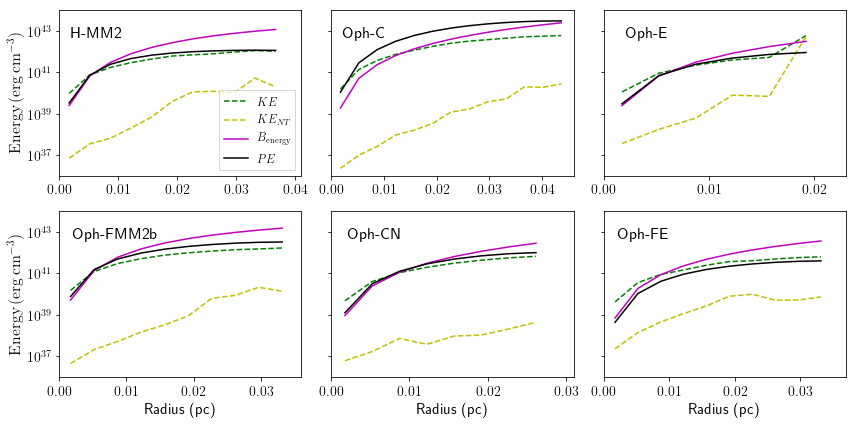

In [31]:
f, axdb = plt.subplots(2, 3, sharex=False, sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = .05, wspace=.08)
axdb = axdb.ravel()
for i in range(1,7,1):
   
    Filename = list_energy_file[int(i)] # to start form H-MM1
    
    outputcorename =  Filename[14]+Filename[15]+Filename[16]+Filename[17]+Filename[18]
    ### to get the proper core name ###
    if  4 > i > 1:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+Filename[18]
    if  i==4:
        outputcorename = Filename[14]+Filename[15]+'h'+Filename[17]+'FMM2b'
    if i > 4:
        outputcorename = Filename[14]+Filename[15]+'h'+'-'+Filename[17]+Filename[18]
    print(outputcorename)
    
    
    radiusinpcforenergy, kineticenergy,kineticnonthermal,potentialenergy,magneticenergy= cfs.readenergydata(Filename)
    
    j = int(i-1)
    
    axdb[j].plot(radiusinpcforenergy,kineticenergy,'g--',label=r'$KE$')
    axdb[j].plot(radiusinpcforenergy,kineticnonthermal,'y--',label=r'$KE_{NT}$')
    axdb[j].plot(radiusinpcforenergy,magneticenergy,'m',label=r'$B_{\rm {energy}}$')
    axdb[j].plot(radiusinpcforenergy,potentialenergy,'k',label=r'$PE$')
    
    axdb[j].set_yscale('log')
    
#     axdb[j].set_xlim(0,.045) 
#     axdb[j].set_xticks(np.arange(0, .0451, 0.01))
#     axdb[j].xaxis.set_tick_params(labelsize=14)
    axdb[j].set_ylim(1e36,1e44) 
#     axdb[j].set_yticks(np.arange(1e36,1e43,1e2))
    axdb[j].yaxis.set_tick_params(labelsize=14)
    axdb[j].text(.002,5e42,r'%s'%(outputcorename),fontsize=16,color='black')
    axdb[0].legend(numpoints=1,fancybox=False,shadow=False,fontsize=12,loc=4)
    

#     axdb[j].xaxis.set_minor_locator(AutoMinorLocator(4))
#     axdb[j].yaxis.set_minor_locator(AutoMinorLocator(4))

axdb[0].set_xlim(np.min(radiusinpcforplot),0.041)
axdb[0].set_xticks(np.arange(0, 0.041, 0.01))
axdb[0].xaxis.set_tick_params(labelsize=14)
axdb[1].set_xlim(np.min(radiusinpcforplot),0.046)
axdb[1].set_xticks(np.arange(0, 0.046, 0.01))
axdb[1].xaxis.set_tick_params(labelsize=14)
axdb[2].set_xlim(np.min(radiusinpcforplot),0.023)
axdb[2].set_xticks(np.arange(0, 0.023, 0.01))
axdb[2].xaxis.set_tick_params(labelsize=14)
axdb[3].set_xlim(np.min(radiusinpcforplot),0.036)
axdb[3].set_xticks(np.arange(0, 0.036, 0.01))
axdb[3].xaxis.set_tick_params(labelsize=14)
axdb[4].set_xlim(np.min(radiusinpcforplot),0.031)
axdb[4].set_xticks(np.arange(0, 0.031, 0.01))
axdb[4].xaxis.set_tick_params(labelsize=14)
axdb[5].set_xlim(np.min(radiusinpcforplot),0.037)
axdb[5].set_xticks(np.arange(0, 0.037, 0.01))
axdb[5].xaxis.set_tick_params(labelsize=14)

axdb[0].set_ylabel(r' $ \rm {Energy \, (erg \, cm^{-3})}$',fontsize=16)
axdb[3].set_ylabel(r' $ \rm {Energy \, (erg \, cm^{-3})}$',fontsize=16)
axdb[3].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[4].set_xlabel(r'Radius (pc)',fontsize=15)
axdb[5].set_xlabel(r'Radius (pc)',fontsize=15)

    
plt.tight_layout()  

#plt.savefig("./Plots_report/figures/energy_all.eps",format='eps',dpi=300)

plt.show()
    
    

In [32]:
list_hourglass_mf_file= sorted(glob.glob('./hourglass_m2f_data/*.dat'))
for name in list_hourglass_mf_file:
    print(name)

./hourglass_m2f_data/H-MM1m2f_k1.dat
./hourglass_m2f_data/H-MM1m2f_k2.dat
./hourglass_m2f_data/H-MM2m2f_k1.dat
./hourglass_m2f_data/H-MM2m2f_k2.dat
./hourglass_m2f_data/OpH-Cm2f_k1.dat
./hourglass_m2f_data/OpH-Cm2f_k2.dat
./hourglass_m2f_data/OpH-Em2f_k1.dat
./hourglass_m2f_data/OpH-Em2f_k2.dat
./hourglass_m2f_data/OpH-Xm2f_k1.dat
./hourglass_m2f_data/OpH-Xm2f_k2.dat
./hourglass_m2f_data/OpHCNm2f_k1.dat
./hourglass_m2f_data/OpHCNm2f_k2.dat
./hourglass_m2f_data/OpHFEm2f_k1.dat
./hourglass_m2f_data/OpHFEm2f_k2.dat


In [33]:
f, axmf = plt.subplots(2, 3, sharex=False, sharey='row',
                                                     figsize=(12,6))
f.subplots_adjust(hspace = .08, wspace=.08)
axmf = axmf.ravel()
for i in range(2,13,2):
    j = int(i/2-1)
    Filename = list_hourglass_mf_file [i]
#     Filename_m2f_data = list_of_masstoflux_files[int(j)+1] # to start form H-MM2
   
    outputcorename =  Filename[21]+Filename[22]+Filename[23]+Filename[24]+Filename[25]
    ### to get the proper core name ###
    if 3 > j > 0:
        outputcorename = Filename[21]+Filename[22]+'h'+Filename[24]+Filename[25]
    if j==3:
        outputcorename = Filename[21]+Filename[22]+'h'+Filename[24]+'FMM2b'
#     
    #### to get the proper core name ###
    if j > 3:
        outputcorename =Filename[21]+Filename[22]+'h'+'-'+Filename[24]+Filename[25]
    print(outputcorename)
    readm2ferrorsk1 = list_hourglass_mf_file [i]
    readm2ferrorsk2 = list_hourglass_mf_file [i+1]
#     print(readm2ferrorsk1)
#     print(readm2ferrorsk2)
    rforplot1 ,m2fk1,m2fk1_ul = cfs.readhourgl_mf_data(readm2ferrorsk1)
    rforplot2 ,m2fk2,m2fk2_ul = cfs.readhourgl_mf_data(readm2ferrorsk2)
    
    
    
    axmf[j].axhline(y=1,linewidth=0.1,color='k',ls=':')
    
    axmf[j].plot(rforplot1,m2fk1,linestyle='--',color='darkred',label=r'$ \kappa_{\beta1} =1/2$')
    axmf[j].plot(rforplot1,m2fk1_ul,linestyle='-',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
    axmf[j].plot(rforplot2,m2fk2,linestyle='--',color='navy',label=r'$ \kappa_{\beta1} =2/3$')
    axmf[j].plot(rforplot2,m2fk2_ul,linestyle='-',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
    
    axmf[0].legend(numpoints=1,fancybox=True,shadow=False,fontsize=14,loc=1)
    
    
    axmf[j].set_ylim(0,5.1) 
    axmf[j].set_yticks(np.arange(0, 5.1, 1))
    axmf[j].yaxis.set_tick_params(labelsize=14)

#     axmf[j].set_xlim(np.min(rforplot1[1:]),0.045)
# #     axmf[j].set_xticks(np.arange(0, 0.045, 0.01))
#     axmf[j].xaxis.set_tick_params(labelsize=14)
    axmf[j].text(.01,3.4,r'%s'%(outputcorename),fontsize=16,color='black')
    
    axmf[j].yaxis.set_minor_locator(AutoMinorLocator(5))
    axmf[j].xaxis.set_minor_locator(AutoMinorLocator(5))
#     plt.ylim(0,3)
#     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
# 

axmf[0].set_xlim(np.min(rforplot2),0.041)
# axmf[0].set_xticks(np.arange(0, 0.041, 0.01))
axmf[0].xaxis.set_tick_params(labelsize=14)
axmf[1].set_xlim(np.min(rforplot1[1:]),0.046)
# axmf[1].set_xticks(np.arange(0, 0.046, 0.01))
axmf[1].xaxis.set_tick_params(labelsize=14)
axmf[2].set_xlim(np.min(rforplot1[1:]),0.023)
# axmf[2].set_xticks(np.arange(np.min(rforplot1[1:]), 0.023, 0.01))
axmf[2].xaxis.set_tick_params(labelsize=14)
axmf[3].set_xlim(np.min(rforplot1[1:]),0.036)
axmf[3].set_xticks(np.arange(0.01, 0.036, 0.01))
axmf[3].xaxis.set_tick_params(labelsize=14)
axmf[4].set_xlim(np.min(rforplot1[1:]),0.031)
axmf[4].set_xticks(np.arange(0.01, 0.031, 0.01))
axmf[4].xaxis.set_tick_params(labelsize=14)
axmf[5].set_xlim(np.min(rforplot1[1:]),0.037)
axmf[5].set_xticks(np.arange(0.01, 0.037, 0.01))
axmf[5].xaxis.set_tick_params(labelsize=14)

axmf[0].set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}}$', fontsize=15)
axmf[3].set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}}$', fontsize=15)
axmf[3].set_xlabel(r'Radius (pc)',fontsize=15)
axmf[4].set_xlabel(r'Radius (pc)',fontsize=15)
axmf[5].set_xlabel(r'Radius (pc)',fontsize=15)
# plt.text(0.004,2.5, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
plt.tight_layout() 
plt.savefig("./Plots_report/figures/mass2flux_hourglass_error_al1.pdf",format='pdf',dpi=300)

plt.show()  
# print(np.min(rforplot1[1:]))

H-MM2
Oph-C
Oph-E
Oph-FMM2b
Oph-CN
Oph-FE


RuntimeError: latex was not able to process the following string:
b'$\\\\frac{M/\\\\Phi}{(M/\\\\Phi)_{\\\\rm{crit}}}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/sayantan/.matplotlib/tex.cache/dd48864915b261cd67c2062e5d48c177.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./dd48864915b261cd67c2062e5d48c177.aux)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.14 ...mily $\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}}
                                                  $}
No pages of output.
Transcript written on dd48864915b261cd67c2062e5d48c177.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x104da29d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\frac{M/\\\\Phi}{(M/\\\\Phi)_{\\\\rm{crit}}}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/sayantan/.matplotlib/tex.cache/dd48864915b261cd67c2062e5d48c177.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./dd48864915b261cd67c2062e5d48c177.aux)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.14 ...mily $\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}}
                                                  $}
No pages of output.
Transcript written on dd48864915b261cd67c2062e5d48c177.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\frac{M/\\\\Phi}{(M/\\\\Phi)_{\\\\rm{crit}}}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/sayantan/.matplotlib/tex.cache/dd48864915b261cd67c2062e5d48c177.tex
LaTeX2e <2018-04-01> patch level 2
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2018/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.def
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2018/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2018/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2018/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./dd48864915b261cd67c2062e5d48c177.aux)
(/usr/local/texlive/2018/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.14 ...mily $\frac{M/\Phi}{(M/\Phi)_{\rm{crit}}}}
                                                  $}
No pages of output.
Transcript written on dd48864915b261cd67c2062e5d48c177.log.




<Figure size 864x432 with 6 Axes>

./hourglass_m2f_data/H-MM1m2f_k1.dat
./hourglass_m2f_data/H-MM1m2f_k2.dat


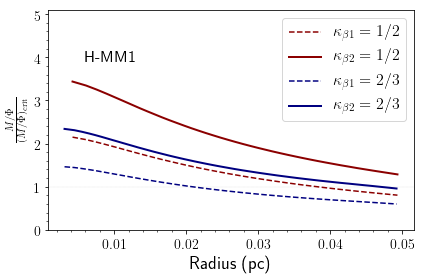

In [34]:
f, axmf = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))


Filename = list_hourglass_mf_file [1]

# Filename_m2f_data = list_of_masstoflux_files[0] # to start form H-MM2
outputcorename =  Filename[21]+Filename[22]+Filename[23]+Filename[24]+Filename[25]
readm2ferrorsk1 = list_hourglass_mf_file [0]
readm2ferrorsk2 = list_hourglass_mf_file[1]
print(readm2ferrorsk1)
print(readm2ferrorsk2)

rforplot1 ,m2fk1,m2fk1_ul = cfs.readhourgl_mf_data(readm2ferrorsk1)
rforplot2 ,m2fk2, m2fk1_u2 = cfs.readhourgl_mf_data(readm2ferrorsk2)

axmf.axhline(y=1,linewidth=0.1,color='k',ls=':')
    
axmf.plot(rforplot1,m2fk1,linestyle='--',color='darkred',label=r'$ \kappa_{\beta1} =1/2$')
axmf.plot(rforplot1,m2fk1_ul,linestyle='-',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
axmf.plot(rforplot2,m2fk2,linestyle='--',color='navy',label=r'$ \kappa_{\beta1} =2/3$')
axmf.plot(rforplot2,m2fk1_u2,linestyle='-',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
axmf.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=1)
    


axmf.set_ylim(0,5.1) 
axmf.set_yticks(np.arange(0, 5.1, 1))
axmf.yaxis.set_tick_params(labelsize=14)
# axmf.set_xlim(np.min(radiusinpcformass[1:]),0.05) 
# axmf.set_xticks(np.arange(np.min(radiusinpcformass[1:]), 0.045, 0.01))
axmf.xaxis.set_tick_params(labelsize=14)
axmf.text(.006,3.9,r'%s'%(outputcorename),fontsize=16,color='black')

axmf.yaxis.set_minor_locator(AutoMinorLocator(5))
axmf.xaxis.set_minor_locator(AutoMinorLocator(5))
# # #     plt.ylim(0,3)
# # #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
# # # 


axmf.set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}}$', fontsize=18)
axmf.set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}$', fontsize=15)
axmf.set_xlabel(r'Radius (pc)',fontsize=18)
# # axmf[4].set_xlabel(r'Radius (pc)',fontsize=14)
# # axmf[5].set_xlabel(r'Radius (pc)',fontsize=14)
# # plt.text(0.004,2.5, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
plt.tight_layout() 
plt.savefig("./Plots_report/figures/mass2flux_error_HMM1.pdf",format='pdf',dpi=300)

plt.show()  


./hourglass_m2f_data/OpH-Cm2f_k1.dat
./hourglass_m2f_data/OpH-Cm2f_k2.dat


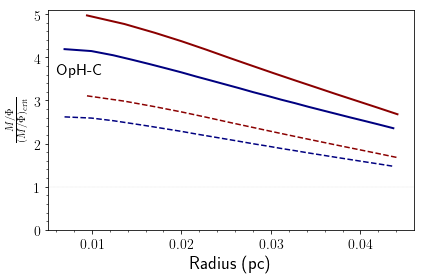

In [35]:
## This was added on 11 March 2019 for the POL-2 proposal.
## We needed to get the mass-to-flux for the OpH-C separately.
f, axmf = plt.subplots(1, 1, sharex='col', sharey='row',
                                                     figsize=(6,4))


Filename = list_hourglass_mf_file [4]

# Filename_m2f_data = list_of_masstoflux_files[0] # to start form H-MM2
outputcorename =  Filename[21]+Filename[22]+Filename[23]+Filename[24]+Filename[25]
readm2ferrorsk1 = list_hourglass_mf_file [4]
readm2ferrorsk2 = list_hourglass_mf_file[5]
print(readm2ferrorsk1)
print(readm2ferrorsk2)

rforplot1 ,m2fk1,m2fk1_ul = cfs.readhourgl_mf_data(readm2ferrorsk1)
rforplot2 ,m2fk2, m2fk1_u2 = cfs.readhourgl_mf_data(readm2ferrorsk2)

axmf.axhline(y=1,linewidth=0.1,color='k',ls=':')
    
axmf.plot(rforplot1,m2fk1,linestyle='--',color='darkred',label=r'$ \kappa_{\beta1} =1/2$')
axmf.plot(rforplot1,m2fk1_ul,linestyle='-',color='darkred',lw=2,label=r'$ \kappa_{\beta2} =1/2$')
axmf.plot(rforplot2,m2fk2,linestyle='--',color='navy',label=r'$ \kappa_{\beta1} =2/3$')
axmf.plot(rforplot2,m2fk1_u2,linestyle='-',color='navy',lw=2,label=r'$ \kappa_{\beta2} =2/3$')
# axmf.legend(numpoints=1,fancybox=True,shadow=False,fontsize=16,loc=1)
    


axmf.set_ylim(0,5.1) 
axmf.set_yticks(np.arange(0, 5.1, 1))
axmf.yaxis.set_tick_params(labelsize=14)
# axmf.set_xlim(np.min(radiusinpcformass[1:]),0.05) 
# axmf.set_xticks(np.arange(np.min(radiusinpcformass[1:]), 0.045, 0.01))
axmf.xaxis.set_tick_params(labelsize=14)
axmf.text(.006,3.6,r''%s'%(outputcorename)',fontsize=16,color='black')

axmf.yaxis.set_minor_locator(AutoMinorLocator(5))
axmf.xaxis.set_minor_locator(AutoMinorLocator(5))
# # #     plt.ylim(0,3)
# # #     plt.legend(numpoints=1,fancybox=True,shadow=False,fontsize=11,loc=1)
# # # 


axmf.set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}}$', fontsize=18)
axmf.set_ylabel(r'$\frac{M/\Phi}{(M/\Phi)_{\rm {crit}}}$', fontsize=15)
axmf.set_xlabel(r'Radius (pc)',fontsize=18)
# # axmf[4].set_xlabel(r'Radius (pc)',fontsize=14)
# # axmf[5].set_xlabel(r'Radius (pc)',fontsize=14)
# # plt.text(0.004,2.5, r'$(\sigma_{B}/B)_c=%.2f $ '%  beta,fontsize=15 )
plt.tight_layout() 
plt.savefig("./Plots_report/figures/mass2flux_error_opH-c.pdf",format='pdf',dpi=300)

plt.show()  



#### print(type(rc))

In [ ]:
print(rc)

In [ ]:
print(radiusforplot[radiusforplot<rc])